#glass.csv

### Importe de datos

In [1]:
import numpy as np
import tensorflow as tf
import math
from matplotlib import pyplot as plt
from urllib import request
from sklearn.metrics import ConfusionMatrixDisplay
example1_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/glass.csv"
f = request.urlopen(example1_url)
dataset = np.loadtxt(f, dtype=float, delimiter=",", skiprows=1)

###Ej 1

In [2]:
dataset[:, 9] -= 1

In [4]:
y_train = dataset[:, 9:]
X_train = dataset[:, :9]

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(7, input_dim=9))
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
hist = model.fit(x=X_train, y=y_train, batch_size = 214, epochs=1000,callbacks=[es])

Epoch 1/1000
1/1 [==============================] - 1s 770ms/step - loss: 51.9187 - accuracy: 0.0421
Epoch 2/1000
1/1 [==============================] - 0s 20ms/step - loss: 51.2654 - accuracy: 0.0421
Epoch 3/1000
1/1 [==============================] - 0s 23ms/step - loss: 50.6126 - accuracy: 0.0421
Epoch 4/1000
1/1 [==============================] - 0s 36ms/step - loss: 49.9607 - accuracy: 0.0421
Epoch 5/1000
1/1 [==============================] - 0s 56ms/step - loss: 49.3099 - accuracy: 0.0421
Epoch 6/1000
1/1 [==============================] - 0s 31ms/step - loss: 48.6610 - accuracy: 0.0421
Epoch 7/1000
1/1 [==============================] - 0s 18ms/step - loss: 48.0147 - accuracy: 0.0514
Epoch 8/1000
1/1 [==============================] - 0s 20ms/step - loss: 47.3719 - accuracy: 0.0514
Epoch 9/1000
1/1 [==============================] - 0s 20ms/step - loss: 46.7338 - accuracy: 0.0514
Epoch 10/1000
1/1 [==============================] - 0s 17ms/step - loss: 46.1017 - accuracy: 0.051

In [ ]:
def clasificar_vidrio(x):
  return np.argmax(model.predict(x=x), axis = 1)

clasificar_vidrio(np.array([1.52, 13, 3.5, 1.2, 73, 0.6, 9, 0.1, 0.2]).reshape(1, 9))[0]

0

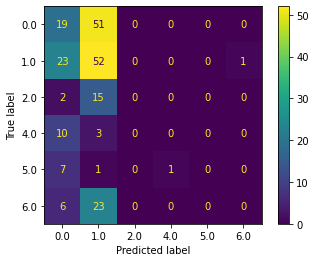

In [ ]:
y_pred = clasificar_vidrio(X_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred)

###PCA

#### Parte 1

In [5]:
from sklearn import decomposition

X0 = X_train - np.mean(X_train, axis = 0)
n,dx=np.shape(X_train)
C=X0.T @ X0/n
ava, ave = np.linalg.eig(C)

In [6]:
ECM = []
for dim in range(1, dx + 1):
  U = X0 @ ave[:,:dim]
  Xh = U @ ave[:,:dim].T
  ECM_iter = np.sum((X0-Xh)**2)/n
  ECM.append(ECM_iter)

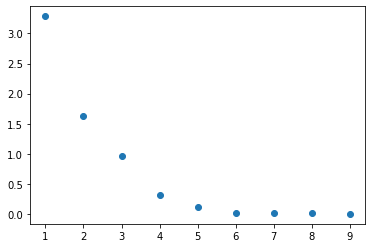

In [7]:
plt.scatter(list(range(1, dx + 1)), ECM)
plt.show()

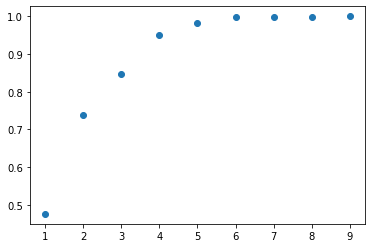

In [8]:
porcentaje_energia = []
suma_total_ava = sum(ava)
for i in range(1, len(ava) + 1):
  porcentaje_energia.append(sum(ava[:i]) / suma_total_ava)

plt.scatter(list(range(1, len(ava) + 1)), porcentaje_energia)
plt.show()

#### Parte 2

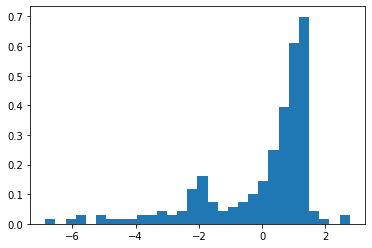

In [12]:
U_una_comp = X0 @ ave[:, :1]
plt.hist(U_una_comp, bins = 30, density=True)
plt.show()

Distribución aproximada a la normal

In [13]:
from scipy.stats import norm

e_media, e_varianza = norm.fit(U_una_comp)

l = []
for i in range(5):
  l.append(np.random.randn() * np.square(e_varianza) + e_media)